## Fourier Neural Operator 1D

In [1]:
## Imports 
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import torch.nn as nn
from timeit import default_timer

c:\Users\s1612415\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## Set seeds
torch.manual_seed(0)
np.random.seed(0)

## Create Data

### Heat Equation:

\begin{align*}
\frac{\partial u}{\partial t} &= \alpha \frac{\partial^2 u}{\partial x^2} \\
u(x, 0) &= x^2 \\
u(0, t) &= u(1, t) = 2 - \exp(-t)
\end{align*}

Solution: 


In [3]:
## TODO: Create Heat Equation Class

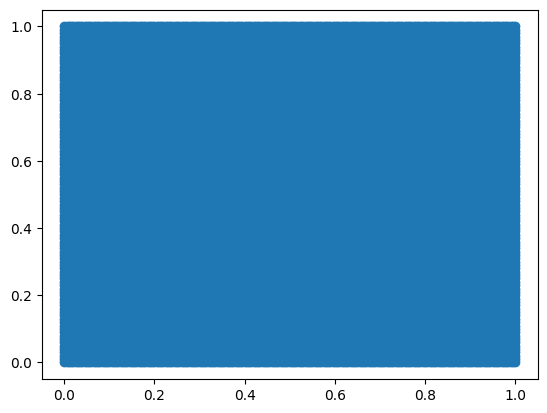

In [4]:
## Steps in x direction
nx = 200
## Steps in t direction
nt = 100

h = 1 / nx ## Step size in x direction
k = 1 / nt ## Step size in t direction

alpha = 0.05
r =  alpha * k / h**2

X, T = np.meshgrid(np.linspace(0, 1, nx + 1), np.linspace(0, 1, nt + 1))

plt.scatter(X, T)
plt.show()

In [5]:
## Initial Condition
beta = np.pi
u0 = np.sin(beta * X[0]) 

## Boundary Conditions
ux0 = 0 # u0[0] # T[:, 0]
uxn = 0 # u0[-1] # 2 - np.exp(-T[:, -1])

In [6]:
A = np.zeros((nx - 1, nx - 1))
B = np.zeros((nx - 1, nx - 1))

for i in range(nx - 1):
    A[i, i] = 2 + 2 * r
    B[i, i] = 2 - 2 * r

for i in range(nx - 2):
    A[i + 1, i] = -r
    A[i, i + 1] = -r
    B[i + 1, i] = r
    B[i, i + 1] = r

Ainv = np.linalg.inv(A)

In [7]:
## Compute Solution
u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

# b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    # b[0] = r * u[j - 1, 0] + r * u[j, 0]
    # b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx])) # + b)

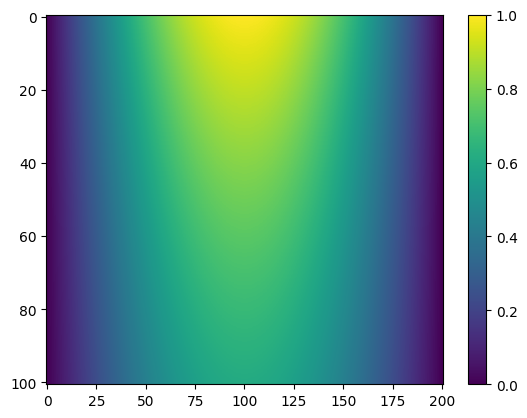

In [8]:
plt.imshow(u, aspect='auto')
plt.colorbar()
plt.show()

In [9]:
## Number of Samples 
n = 10000
## Output
data_in = []
data_out = []

## Generate Data
for _ in range(n):
    beta = np.random.uniform(-10, 10)
    beta_vec = beta * np.ones(201)

    u0 = np.sin(beta * X[0])

    data_in.append([beta_vec , np.arange(0, 1.005, 0.005)])

    ## Create Solution Matrix
    u = np.zeros((nt + 1, nx + 1))
    u[0] = u0
    u[:, 0] = ux0
    u[:, -1] = uxn

    # b = np.zeros(nx - 1)
    for j in range(1, nt + 1):
        # b[0] = r * u[j - 1, 0] + r * u[j, 0]
        # b[-1] = r * u[j - 1, -1] + r * u[j, -1]
        u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx])) # + b)

    data_out.append(u[-1])

In [10]:
data_in = np.array(torch.tensor(data_in).float())
data_out = np.array(torch.tensor(data_out).float().unsqueeze(1))

C:\Users\s1612415\AppData\Local\Temp\ipykernel_20996\974941267.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  data_in = np.array(torch.tensor(data_in).float())


In [11]:
## Data Loader
from torch.utils.data import Dataset, DataLoader
import pandas as pd

class CustomDataset(Dataset):
    def __init__(self, t, x):
        self.t = t
        self.x = x

    def __len__(self):
        return len(self.t)
    
    def __getitem__(self, index):
        return self.t[index], self.x[index]

data = CustomDataset(data_in, data_out)

In [12]:
data[0][0]

array([[0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701, 0.9762701,
        0.9762701, 0.9762701, 0.976270

In [13]:
data[0][0].shape

(2, 201)

In [14]:
dataloader = DataLoader(data, batch_size=16, shuffle=True)

## Build Network

In [15]:
## Get Device for Training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device.')

Using cpu device.


In [16]:
## Fourier Integral Kernel 1D
class FourierIntegralKernel1D(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, modes: int):
        super(FourierIntegralKernel1D, self).__init__()
        '''
        '''
        self.in_channels = in_channels
        self.out_channels = out_channels 
        self.modes = modes 
        ## Set (random) weights for the linear transform
        weights = torch.rand(self.modes, self.out_channels, self.in_channels, dtype=torch.cfloat) 
        self.weights = nn.Parameter(weights / (self.in_channels * self.out_channels)) ## Optional: Scale weights

    def forward(self, v: torch.Tensor) -> torch.Tensor:
        '''
        FFT -> Linear Transform -> Inverse FFT
        '''
        ## FFT
        v_rfft = torch.fft.rfft(v) 

        ## Linear Transform 
        lv_rfft = torch.zeros(v_rfft.shape, dtype=torch.cfloat)
        lv_rfft[:, :, :self.modes] = torch.einsum('koi, bki -> bko', self.weights, v_rfft[:, :, :self.modes].permute(0, 2, 1)).permute(0, 2, 1) ## TODO: Should I have 5 dimensions here?
        
        ## Inverse FFT
        v2 = torch.fft.irfft(lv_rfft, n=v.shape[-1])
        return v2
        

In [17]:
## Fourier Network Operator 1D
class FourierNetworkOperator1D(nn.Module):
    def __init__(self, da: int, du: int, width: int, modes: int):
        super(FourierNetworkOperator1D, self).__init__()
        '''
        '''
        self.width = width
        self.modes = modes

        ## P: Lifts the lower dimensional function to higher dimensional space
        self.P = nn.Conv1d(da, self.width, 1) ## TODO: Change da

        ## K: Fourier integral kernel operator
        self.k0 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        self.k1 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        self.k2 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        self.k3 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k4 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k5 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k6 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k7 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k8 = FourierIntegralKernel1D(self.width, self.width, self.modes)
        # self.k9 = FourierIntegralKernel1D(self.width, self.width, self.modes)

        ## W: Pointwise linear operator
        self.w0 = nn.Conv1d(self.width, self.width, 1)
        self.w1 = nn.Conv1d(self.width, self.width, 1)
        self.w2 = nn.Conv1d(self.width, self.width, 1)
        self.w3 = nn.Conv1d(self.width, self.width, 1)
        # self.w4 = nn.Conv1d(self.width, self.width, 1)
        # self.w5 = nn.Conv1d(self.width, self.width, 1)
        # self.w6 = nn.Conv1d(self.width, self.width, 1)
        # self.w7 = nn.Conv1d(self.width, self.width, 1)
        # self.w8 = nn.Conv1d(self.width, self.width, 1)
        # self.w9 = nn.Conv1d(self.width, self.width, 1)

        ## Q: Projects the higher dimensional function to lower dimensional space
        self.Q = nn.Conv1d(self.width, du, 1) ## TODO: Change du

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        '''
        '''
        ## P
        x = self.P(x)

        ## Fourier Layer #0
        ## K
        x1 = self.k0(x)
        ## W
        x2 = self.w0(x)
        ## Sum
        x = x1 + x2
        ## Gelu
        x = nn.functional.gelu(x)
        # x = nn.functional.gelu(x1)
        # x = nn.functional.gelu(x2)

        ## Fourier Layer #1
        ## K
        x1 = self.k1(x)
        ## W
        x2 = self.w1(x)
        ## Sum 
        x = x1 + x2
        ## Gelu
        x = nn.functional.gelu(x)
        # x = nn.functional.gelu(x1)
        # x = nn.functional.gelu(x2)

        ## Fourier Layer #2
        ## K
        x1 = self.k2(x)
        ## W
        x2 = self.w2(x)
        ## Sum
        x = x1 + x2
        ## Gelu
        x = nn.functional.gelu(x)
        # x = nn.functional.gelu(x1)
        # x = nn.functional.gelu(x2)

        ## Fourier Layer #3
        ## K
        x1 = self.k3(x)
        ## W
        x2 = self.w3(x)
        ## Sum
        x = x1 + x2
        ## Gelu
        x = nn.functional.gelu(x)
        # x = nn.functional.gelu(x1)
        # x = nn.functional.gelu(x2)

        # ## Fourier Layer #4
        # ## K
        # x1 = self.k4(x)
        # ## W
        # x2 = self.w4(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #5
        # ## K
        # x1 = self.k5(x)
        # ## W
        # x2 = self.w5(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #6
        # ## K
        # x1 = self.k6(x)
        # ## W
        # x2 = self.w6(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #7
        # ## K
        # x1 = self.k7(x)
        # ## W
        # x2 = self.w7(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #8
        # ## K
        # x1 = self.k8(x)
        # ## W
        # x2 = self.w8(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        # ## Fourier Layer #9
        # ## K
        # x1 = self.k9(x)
        # ## W
        # x2 = self.w9(x)
        # ## Sum
        # x = x1 + x2
        # ## Gelu
        # x = nn.functional.gelu(x)
        # # x = nn.functional.gelu(x1)
        # # x = nn.functional.gelu(x2)

        ## Q
        x = self.Q(x)
        return x


In [18]:
# import operator
# from functools import reduce

# def count_parameters(model):
#     c = 0
#     for p in list(model.parameters()):
#         c += reduce(operator.mul, list(p.size() + (2, ) if p.is_complex() else p.size()))
#     return c

# model = FourierNetworkOperator1D(2, 1, width=64, modes=4)
# print(f'Number of parameters: {count_parameters(model)}')

In [19]:
def count_parameters(model):
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        print(f'{name}: {params}')
        total_params+=params
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
model = FourierNetworkOperator1D(2, 1, width=64, modes=16)
num_parameters = count_parameters(model)

P.weight: 128
P.bias: 64
k0.weights: 65536
k1.weights: 65536
k2.weights: 65536
k3.weights: 65536
w0.weight: 4096
w0.bias: 64
w1.weight: 4096
w1.bias: 64
w2.weight: 4096
w2.bias: 64
w3.weight: 4096
w3.bias: 64
Q.weight: 64
Q.bias: 1
Total Trainable Params: 279041


In [20]:
print(torch.mean(model.k0.weights))
print(torch.std(model.k0.weights))

tensor(0.0001+0.0001j, grad_fn=<MeanBackward0>)
tensor(9.9577e-05, grad_fn=<StdBackward0>)


## Train

In [21]:
## Model Parameters
learning_rate = 1e-3
epochs = 5

In [22]:
## Loss Function
loss_function = nn.MSELoss()

In [23]:
## Optimizer 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
vec = torch.from_numpy(np.arange(0, 1.005, 0.005)).float().unsqueeze(0).unsqueeze(0)

beta: 6.143844901770926


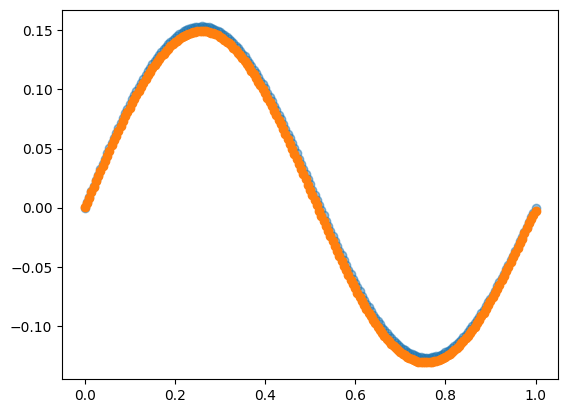

In [45]:
## Test 0
beta0 = np.random.uniform(-10, 10)
print(f'beta: {beta0}')
beta0_vec = torch.from_numpy(beta0 * np.ones(201)).float().unsqueeze(0).unsqueeze(0)

u0 = torch.from_numpy(np.sin(beta0 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta0_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta0_vec, vec), 1)).detach())
plt.show()

beta: 4.115054390602959


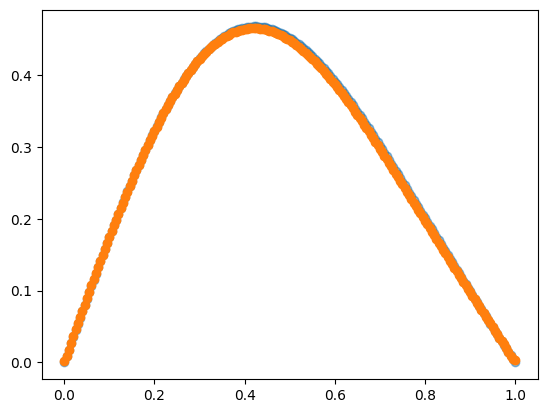

In [46]:
## Test 1
beta1 = np.random.uniform(-10, 10)
print(f'beta: {beta1}')
beta1_vec = torch.from_numpy(beta1 * np.ones(201)).float().unsqueeze(0).unsqueeze(0)

u0 = torch.from_numpy(np.sin(beta1 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta1_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta1_vec, vec), 1)).detach())
plt.show()

beta: -9.968876041407357


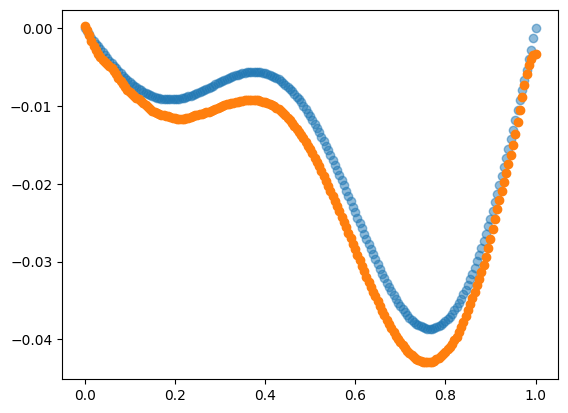

In [47]:
## Test 2
beta2 = np.random.uniform(-10, 10)
print(f'beta: {beta2}')
beta2_vec = torch.from_numpy(beta2 * np.ones(201)).float().unsqueeze(0).unsqueeze(0)

u0 = torch.from_numpy(np.sin(beta2 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta2_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta2_vec, vec), 1)).detach())
plt.show()

In [28]:
## Training Loop
def train_loop(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    for batch, (t, x) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(t)
        loss = loss_function(pred, x)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(t)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [29]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(dataloader, model, loss_function, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 0.053883  [    0/10000]
loss: 0.000546  [ 1600/10000]
loss: 0.000042  [ 3200/10000]
loss: 0.000037  [ 4800/10000]
loss: 0.000031  [ 6400/10000]
loss: 0.001042  [ 8000/10000]
loss: 0.000023  [ 9600/10000]
Epoch 2
-------------------------------
loss: 0.000030  [    0/10000]
loss: 0.000025  [ 1600/10000]
loss: 0.000096  [ 3200/10000]
loss: 0.000022  [ 4800/10000]
loss: 0.000011  [ 6400/10000]
loss: 0.000301  [ 8000/10000]
loss: 0.000016  [ 9600/10000]
Epoch 3
-------------------------------
loss: 0.000008  [    0/10000]
loss: 0.000086  [ 1600/10000]
loss: 0.000077  [ 3200/10000]
loss: 0.000028  [ 4800/10000]
loss: 0.000016  [ 6400/10000]
loss: 0.000065  [ 8000/10000]
loss: 0.000046  [ 9600/10000]
Epoch 4
-------------------------------
loss: 0.000006  [    0/10000]
loss: 0.000008  [ 1600/10000]
loss: 0.000035  [ 3200/10000]
loss: 0.000112  [ 4800/10000]
loss: 0.000031  [ 6400/10000]
loss: 0.000055  [ 8000/10000]
loss: 0.000051  [ 9600/10000]


## Test

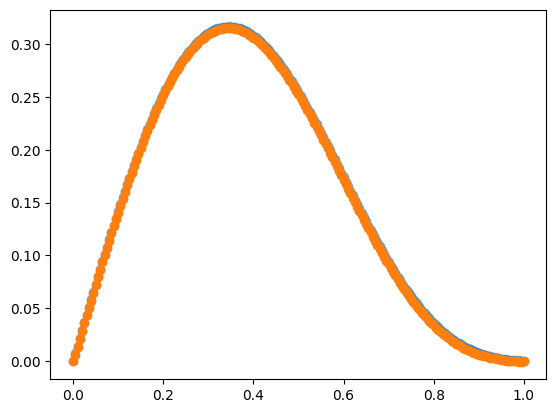

In [30]:
## Test 0
u0 = torch.from_numpy(np.sin(beta0 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta0_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta0_vec, vec), 1)).detach())
plt.show()

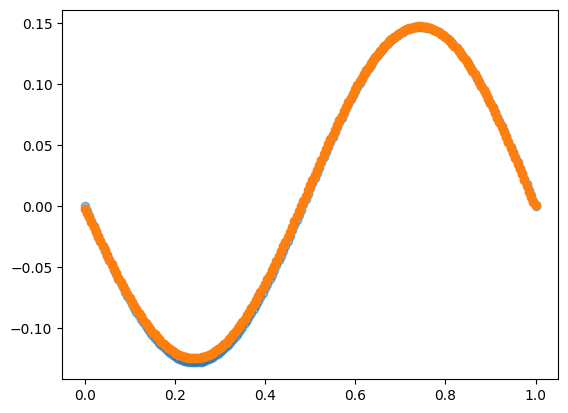

In [31]:
## Test 1
u0 = torch.from_numpy(np.sin(beta1 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta1_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta1_vec, vec), 1)).detach())
plt.show()

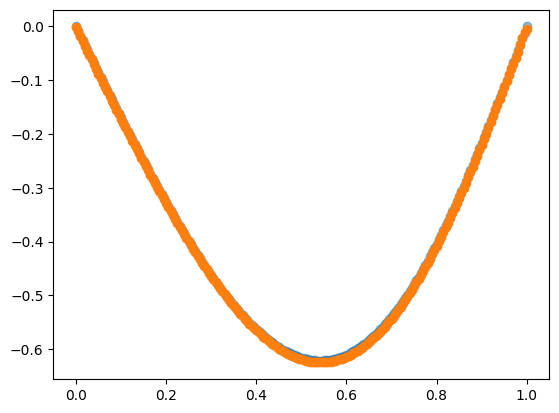

In [32]:
## Test 2
u0 = torch.from_numpy(np.sin(beta2 * X[0])).float().unsqueeze(0).unsqueeze(0)

u = np.zeros((nt + 1, nx + 1))
u[0] = u0
u[:, 0] = ux0
u[:, -1] = uxn

b = np.zeros(nx - 1)
for j in range(1, nt + 1):
    b[0] = r * u[j - 1, 0] + r * u[j, 0]
    b[-1] = r * u[j - 1, -1] + r * u[j, -1]
    u[j, 1:nx] = Ainv @ ((B @ u[j - 1, 1:nx]) + b)

plt.scatter(np.linspace(0, 1, nx + 1), u[-1], alpha=0.5)
# plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta2_vec, u0), 1)).detach())
plt.scatter(np.linspace(0, 1, nx + 1), model(torch.cat((beta2_vec, vec), 1)).detach())
plt.show()

### What does the Fourier Layer do?

In [33]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.k0.register_forward_hook(get_activation('k0'))
model.w0.register_forward_hook(get_activation('w0'))
model.k1.register_forward_hook(get_activation('k1'))
model.w1.register_forward_hook(get_activation('w1'))
model.k2.register_forward_hook(get_activation('k2'))
model.w2.register_forward_hook(get_activation('w2'))
model.k3.register_forward_hook(get_activation('k3'))
model.w3.register_forward_hook(get_activation('w3'))

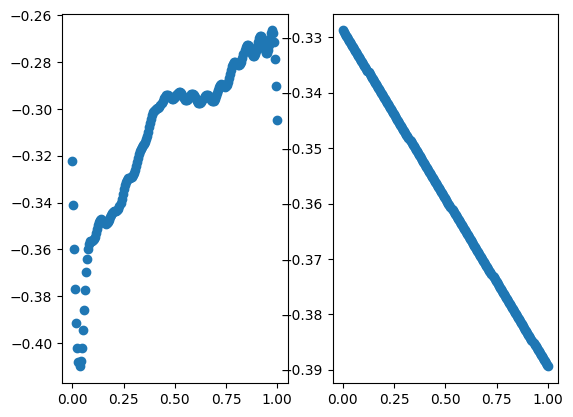

In [34]:
upredt0 = model(torch.cat((beta0_vec, vec), 1))
# print(activation['k0'].shape)

plt.subplot(121)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['k0'][0], axis=0))
plt.subplot(122)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['w0'][0], axis=0))
plt.show()

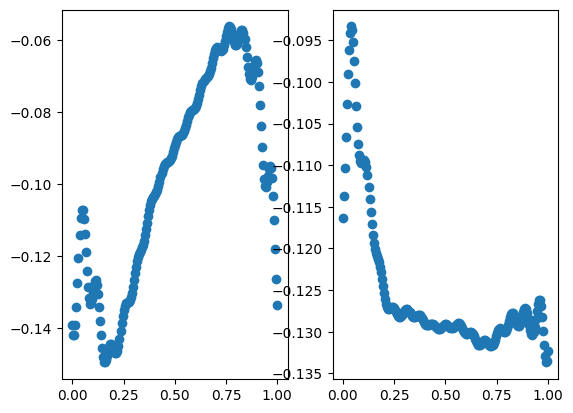

In [35]:
plt.subplot(121)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['k1'][0], axis=0))
plt.subplot(122)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['w1'][0], axis=0))
plt.show()

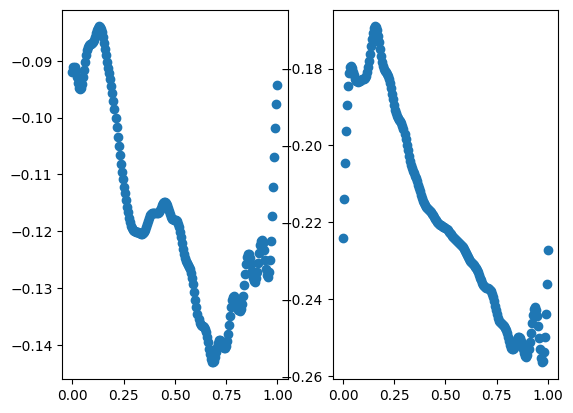

In [36]:
plt.subplot(121)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['k2'][0], axis=0))
plt.subplot(122)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['w2'][0], axis=0))
plt.show()

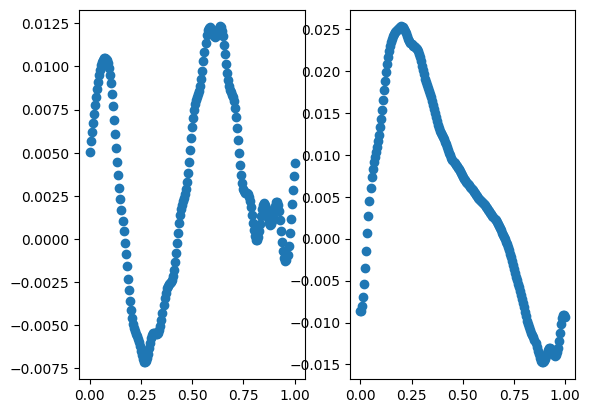

In [37]:
plt.subplot(121)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['k3'][0], axis=0))
plt.subplot(122)
plt.scatter(np.linspace(0, 1, nx + 1), torch.mean(activation['w3'][0], axis=0))
plt.show()

In [38]:
torch.mean(activation['k0'][0], axis=0)

tensor([-0.3220, -0.3408, -0.3596, -0.3770, -0.3915, -0.4021, -0.4083, -0.4100,
        -0.4077, -0.4021, -0.3944, -0.3857, -0.3773, -0.3698, -0.3640, -0.3599,
        -0.3576, -0.3565, -0.3562, -0.3563, -0.3562, -0.3556, -0.3546, -0.3531,
        -0.3514, -0.3497, -0.3484, -0.3475, -0.3472, -0.3473, -0.3478, -0.3484,
        -0.3488, -0.3490, -0.3487, -0.3481, -0.3472, -0.3462, -0.3452, -0.3445,
        -0.3439, -0.3436, -0.3435, -0.3434, -0.3431, -0.3425, -0.3415, -0.3401,
        -0.3383, -0.3363, -0.3344, -0.3326, -0.3311, -0.3302, -0.3296, -0.3294,
        -0.3293, -0.3293, -0.3290, -0.3284, -0.3274, -0.3260, -0.3244, -0.3226,
        -0.3208, -0.3193, -0.3180, -0.3170, -0.3162, -0.3155, -0.3148, -0.3140,
        -0.3128, -0.3114, -0.3097, -0.3078, -0.3059, -0.3041, -0.3026, -0.3015,
        -0.3007, -0.3002, -0.2999, -0.2997, -0.2994, -0.2990, -0.2983, -0.2974,
        -0.2964, -0.2955, -0.2947, -0.2941, -0.2939, -0.2940, -0.2943, -0.2948,
        -0.2952, -0.2955, -0.2956, -0.29